<a href="https://colab.research.google.com/github/FridaAchieng/Achys-Foodspot/blob/main/Analysis_of_Restaurant_Inspections_in_New_York_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Restaurant Inspections in New York City**

## **Project Goal**

The main goal is to analyze the health inspection data of NYC restaurants to understand food safety compliance and public health risks. This involves answering questions like:

* How often do restaurants get violations, and how severe are these violations?

* What factors influence inspection scores and grades? (Location, cuisine type, time, etc.)

* Are there patterns or trends in violations and grades over time or across boroughs?

* Can we identify restaurants with consistently poor performance or frequent critical violations?

* How effective are inspections in improving restaurant compliance?


This understanding will help the Department of Health or restaurant owners:

* Improve food safety standards by focusing enforcement and education efforts

* Inform customers about restaurant safety and quality

* Monitor trends to guide policy decisions or resource allocation

* Reduce foodborne illness risks and enhance public trust

# **About the Dataset**


This dataset contains detailed inspection records for NYC restaurants and college cafeterias from 2015 through 2019. It includes results from health inspections conducted by the NYC Department of Health and Mental Hygiene, which use a letter grading system (“A,” “B,” “C”) based on violation scores.

- Dataset spans 2015 to 2019, avoiding COVID-19 inspection pauses.

- One inspection on a given date for a restaurant may result in multiple violations, one row per violation. But only one overall score and one grade is assigned for that entire inspection. To avoid duplicates, aggregation is advised.

- Not all inspections are eligible for grading. Gradable inspections include:
  - Cycle Inspection / Initial Inspection
  - Cycle Inspection / Re-inspection
  - Pre-permit (Operational) / Initial or Re-inspection

**Reference:**  
NYC Department of Health and Mental Hygiene - Restaurant Inspection Results  
 (https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data)



## Data Description
| **Column**              | **Description**                                                                                                    | **Details / Possible Values**                                                                                  |
|-------------------------|--------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **CAMIS**               | Unique identifier for the restaurant                                                                               | Numeric ID unique to each restaurant                                                                             |
| **DBA**                 | Restaurant name (Doing Business As)                                                                                | Official business name                                                                                           |
| **BORO**                | Borough of the restaurant location                                                                                 | 1 = Manhattan, 2 = Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island, or missing                              |
| **CUISINE DESCRIPTION** | Type of cuisine served                                                                                              | Text description, e.g., Italian, Chinese, Mexican                                                               |
| **INSPECTION DATE**     | Date of the inspection                                                                                              | Format: YYYY-MM-DD                                                                                               |
| **ACTION**              | Result or action linked to the inspection                                                                           | Examples: Violations cited, No violations, Re-opened by DOHMH, Closed by DOHMH, Missing                         |
| **VIOLATION CODE**      | Code associated with each violation                                                                                 | Alphanumeric code                                                                                                |
| **VIOLATION DESCRIPTION** | Description of the violation                                                                                        | Text explanation                                                                                                |
| **CRITICAL FLAG**       | Whether the violation is critical                                                                                   | Critical, Not Critical, Not Applicable                                                                           |
| **SCORE**               | Total numeric score for the inspection                                                                               | Lower scores = better compliance; higher scores = more or severe violations                                      |
| **GRADE**               | Letter grade based on the score                                                                                      | A (best), B, C, N (Not Yet Graded), Z (Pending), P (Pending after re-opening)                                   |
| **GRADE DATE**          | Date when the grade was issued                                                                                        | Format: YYYY-MM-DD                                                                                               |
| **RECORD DATE**         | Date record was added to dataset                                                                                      | Format: YYYY-MM-DD                                                                                               |
| **INSPECTION TYPE**     | Type and program of inspection                                                                                        | Examples: Cycle Inspection/Initial, Pre-Permit/Compliance, Smoke-Free Air Act/Complaint                         |


# **Installing Libraries**

In [ ]:
#loading data
import pandas as pd
import numpy as np
import plotly.express as px

#visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#E6E6FA'


## **Loading Data**

In [ ]:
dataset_url = "/content/DOHMH_New_York_City_Restaurant_Inspection_Results_20250704.csv"

In [ ]:
inspections_raw = pd.read_csv(dataset_url)

In [ ]:
#view data
inspections_raw.head()

,CAMIS,DBA,BORO,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41700974,MARLIN BAR AT TOMMY BAHAMA AND TOMMY BAHAMA RE...,Manhattan,Caribbean,12/27/2019,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,10.0,NaN,NaN,07/03/2025,Cycle Inspection / Initial Inspection
1,50084342,PARQ,Bronx,American,12/26/2019,Violations were cited in the following area(s).,10A,Toilet facility not maintained and provided wi...,Not Critical,19.0,NaN,NaN,07/03/2025,Cycle Inspection / Initial Inspection
2,50084342,PARQ,Bronx,American,12/26/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,19.0,NaN,NaN,07/03/2025,Cycle Inspection / Initial Inspection
3,50034728,THE MERMAID INN,Manhattan,Seafood,12/26/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,12/26/2019,07/03/2025,Cycle Inspection / Initial Inspection
4,50034728,THE MERMAID INN,Manhattan,Seafood,12/26/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,12.0,A,12/26/2019,07/03/2025,Cycle Inspection / Initial Inspection


In [ ]:
#data summary
inspections_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  2667 non-null   int64  
 1   DBA                    2667 non-null   object 
 2   BORO                   2667 non-null   object 
 3   CUISINE DESCRIPTION    2667 non-null   object 
 4   INSPECTION DATE        2667 non-null   object 
 5   ACTION                 2667 non-null   object 
 6   VIOLATION CODE         2597 non-null   object 
 7   VIOLATION DESCRIPTION  2597 non-null   object 
 8   CRITICAL FLAG          2667 non-null   object 
 9   SCORE                  2535 non-null   float64
 10  GRADE                  1493 non-null   object 
 11  GRADE DATE             1470 non-null   object 
 12  RECORD DATE            2667 non-null   object 
 13  INSPECTION TYPE        2667 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 291.8+

## **Data Processing**

In [ ]:
# Check missing values
inspections_raw.isnull().sum().sort_values(ascending=False)

,0
GRADE DATE,1197
GRADE,1174
SCORE,132
VIOLATION CODE,70
VIOLATION DESCRIPTION,70
CAMIS,0
ACTION,0
INSPECTION DATE,0
CUISINE DESCRIPTION,0
BORO,0


In [ ]:
inspections_raw.dropna(subset=['GRADE DATE', 'GRADE'], inplace=True)

In [ ]:
#filter inspection column to include only gradable inspections
inspections_df = inspections_raw[
                (inspections_raw['INSPECTION TYPE'] == 'Cycle Inspection / Re-inspection') |
                (inspections_raw['INSPECTION TYPE'] == 'Pre-permit (Operational) / Re-inspection') |
                (inspections_raw['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection') |
                (inspections_raw['INSPECTION TYPE'] == 'Pre-permit (Operational) / Initial Inspection')
                ].copy()

In [ ]:
#confirm only gradable inspections have been filtered
inspections_df['INSPECTION TYPE'].unique()

array(['Cycle Inspection / Initial Inspection',
       'Pre-permit (Operational) / Re-inspection',
       'Pre-permit (Operational) / Initial Inspection',
       'Cycle Inspection / Re-inspection'], dtype=object)

In [ ]:
# change column titles to title case
inspections_df.columns = inspections_df.columns.str.title()

In [ ]:
inspections_df.head()

,Camis,Dba,Boro,Cuisine Description,Inspection Date,Action,Violation Code,Violation Description,Critical Flag,Score,Grade,Grade Date,Record Date,Inspection Type
3,50034728,THE MERMAID INN,Manhattan,Seafood,12/26/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,12/26/2019,07/03/2025,Cycle Inspection / Initial Inspection
4,50034728,THE MERMAID INN,Manhattan,Seafood,12/26/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,12.0,A,12/26/2019,07/03/2025,Cycle Inspection / Initial Inspection
6,50034728,THE MERMAID INN,Manhattan,Seafood,12/26/2019,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,12.0,A,12/26/2019,07/03/2025,Cycle Inspection / Initial Inspection
9,50085872,LU WEI DA SHI,Queens,Chinese,12/19/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,12/19/2019,07/03/2025,Cycle Inspection / Initial Inspection
11,50085872,LU WEI DA SHI,Queens,Chinese,12/19/2019,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,9.0,A,12/19/2019,07/03/2025,Cycle Inspection / Initial Inspection


In [ ]:
# change restaurant name (dba) to title case
inspections_df['Dba'] = inspections_df['Dba'].str.title()

In [ ]:
inspections_df

,Camis,Dba,Boro,Cuisine Description,Inspection Date,Action,Violation Code,Violation Description,Critical Flag,Score,Grade,Grade Date,Record Date,Inspection Type
3,50034728,The Mermaid Inn,Manhattan,Seafood,12/26/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,12.0,A,12/26/2019,07/03/2025,Cycle Inspection / Initial Inspection
4,50034728,The Mermaid Inn,Manhattan,Seafood,12/26/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,12.0,A,12/26/2019,07/03/2025,Cycle Inspection / Initial Inspection
6,50034728,The Mermaid Inn,Manhattan,Seafood,12/26/2019,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,12.0,A,12/26/2019,07/03/2025,Cycle Inspection / Initial Inspection
9,50085872,Lu Wei Da Shi,Queens,Chinese,12/19/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,12/19/2019,07/03/2025,Cycle Inspection / Initial Inspection
11,50085872,Lu Wei Da Shi,Queens,Chinese,12/19/2019,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,9.0,A,12/19/2019,07/03/2025,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,50015171,New Amsterdam Theater,Manhattan,American,11/20/2015,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,10.0,A,11/20/2015,07/03/2025,Cycle Inspection / Initial Inspection
2657,50015538,American Airlines Theater,Manhattan,American,11/19/2015,Violations were cited in the following area(s).,05D,Hand washing facility not provided in or near ...,Critical,12.0,A,11/19/2015,07/03/2025,Cycle Inspection / Initial Inspection
2658,50015538,American Airlines Theater,Manhattan,American,11/19/2015,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,12.0,A,11/19/2015,07/03/2025,Cycle Inspection / Initial Inspection
2660,40944945,Stage 42,Manhattan,American,10/14/2015,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,5.0,A,10/14/2015,07/03/2025,Cycle Inspection / Re-inspection


In [ ]:
# extract year and month
inspections_df['Inspection Date'] = pd.to_datetime(inspections_df['Inspection Date'])
inspections_df['Year'] = inspections_df['Inspection Date'].dt.year
inspections_df['Month'] = inspections_df['Inspection Date'].dt.month
inspections_df['Month Name'] = inspections_df['Inspection Date'].dt.month_name()

In [ ]:
# aggreggate  data by camis and inspection date to remove duplicates
aggregated_inspections = inspections_df.groupby(["Camis", "Dba", "Inspection Date"]).agg({
    "Violation Code": "count",
    "Score": "max",
    "Grade": "first",
    "Inspection Type": "first",
    "Boro": "first",
    "Cuisine Description": "first"
}).reset_index().rename(columns={"Violation Code": "Violation Count"})

In [ ]:
#add year month
aggregated_inspections['Year'] = aggregated_inspections['Inspection Date'].dt.year
aggregated_inspections['Month'] = aggregated_inspections['Inspection Date'].dt.month
aggregated_inspections['Inspection Month'] = aggregated_inspections['Inspection Date'].dt.to_period('M')
aggregated_inspections['Month Name'] = aggregated_inspections['Inspection Date'].dt.month_name()

In [ ]:
aggregated_inspections.head()

,Camis,Dba,Inspection Date,Violation Count,Score,Grade,Inspection Type,Boro,Cuisine Description,Year,Month,Inspection Month,Month Name
0,40359480,1 East 66Th Street Kitchen,2019-10-01,2,9.0,A,Cycle Inspection / Initial Inspection,Manhattan,American,2019,10,2019-10,October
1,40364858,Douglaston Club,2017-08-16,3,11.0,A,Cycle Inspection / Initial Inspection,Queens,American,2017,8,2017-08,August
2,40364858,Douglaston Club,2018-10-25,3,11.0,A,Cycle Inspection / Initial Inspection,Queens,American,2018,10,2018-10,October
3,40364858,Douglaston Club,2019-11-20,2,5.0,A,Cycle Inspection / Initial Inspection,Queens,American,2019,11,2019-11,November
4,40368022,Grizzly Grounds,2017-06-13,1,2.0,A,Cycle Inspection / Initial Inspection,Bronx,Coffee/Tea,2017,6,2017-06,June


In [ ]:
inspections_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 3 to 2661
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Camis                  1459 non-null   int64         
 1   Dba                    1459 non-null   object        
 2   Boro                   1459 non-null   object        
 3   Cuisine Description    1459 non-null   object        
 4   Inspection Date        1459 non-null   datetime64[ns]
 5   Action                 1459 non-null   object        
 6   Violation Code         1426 non-null   object        
 7   Violation Description  1426 non-null   object        
 8   Critical Flag          1459 non-null   object        
 9   Score                  1459 non-null   float64       
 10  Grade                  1459 non-null   object        
 11  Grade Date             1459 non-null   object        
 12  Record Date            1459 non-null   object        
 13  Inspecti

# **Exploratory Analysis and Visualization**

## **Overview**

In [ ]:
inspections_df['Camis'].nunique()

343

In [ ]:
# Unique values in Boro, Cuisine, Grade
print("Boroughs:", inspections_df['Boro'].unique())
print("Cuisines:", inspections_df['Cuisine Description'].nunique())
print("Grades:", inspections_df['Grade'].unique())

Boroughs: ['Manhattan' 'Queens' 'Brooklyn' 'Bronx' 'Staten Island']
Cuisines: 42
Grades: ['A' 'C' 'B']


 ### **Distribution of Violations Per Inspection**

In [ ]:
# Count violations per inspection
violations_per_inspection = inspections_df.groupby(['Inspection Date']).agg({'Violation Code': 'count','Dba':'count'}).reset_index()
violations_per_inspection.rename(columns={'Violation Code': 'Violation Count'}, inplace=True)
violations_per_inspection

,Inspection Date,Violation Count,Dba
0,2015-10-14,2,2
1,2015-11-19,2,2
2,2015-11-20,3,3
3,2016-01-21,3,3
4,2016-03-11,2,2
...,...,...,...
426,2019-12-16,7,7
427,2019-12-17,1,4
428,2019-12-18,3,3
429,2019-12-19,3,3


In [ ]:
from matplotlib import pyplot as plt
violations_per_inspection['Violation Count'].plot(kind='hist', bins=20, title='Violation Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

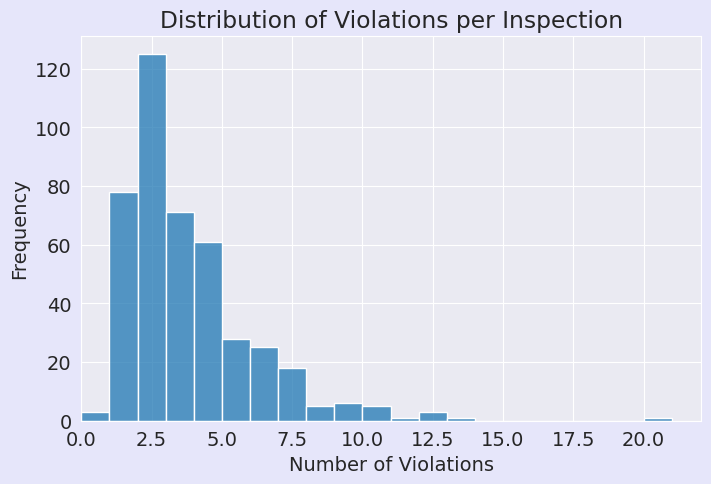

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(violations_per_inspection['Violation Code'], bins=15, binwidth=1)
plt.title('Distribution of Violations per Inspection')
plt.xlabel('Number of Violations')
plt.ylabel('Frequency')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

**Insight:** Most inspections results in two counts of violations. Very few inspections have zero violations.

### **Most common violation codes**

In [ ]:
top_violations = inspections_df['Violation Code'].value_counts().head(10)

/tmp/ipython-input-105-2361801183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_violations.index, y=top_violations.values, palette= 'viridis')


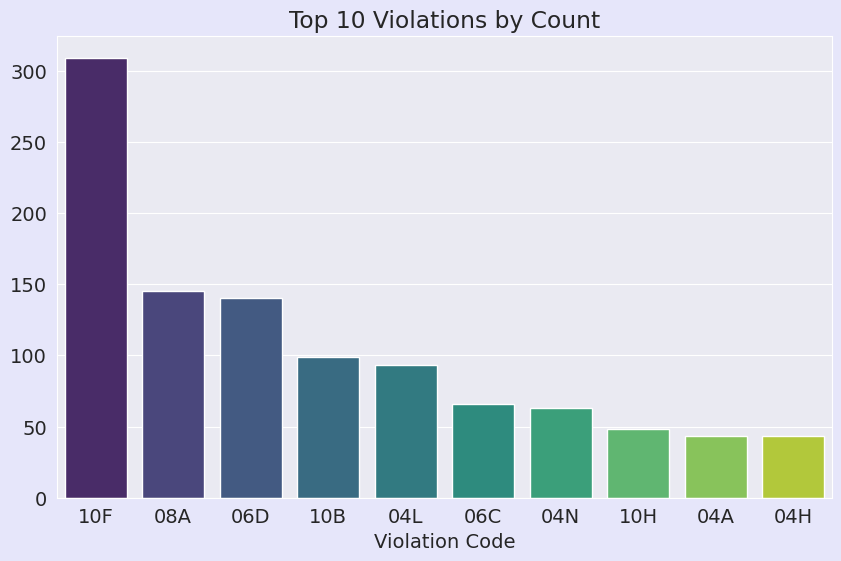

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_violations.index, y=top_violations.values, palette= 'viridis')
plt.title('Top 10 Violations by Count')
plt.show()

**Insight:** Most frequent violations are pest control issues (08A) and maintenance violations (10F, 06D)

### **Distribution of Inspection Grades**

In [ ]:
#count of inspections by grade
grade_counts = aggregated_inspections['Grade'].value_counts(normalize=True).reset_index(name='count')

In [ ]:
# use plotly include figsize
fig = px.bar(grade_counts,
             x='Grade',
             y='count',
             title='Distribution of Inspection Grades',
             height=500,
             width=600,
             color='Grade',
             color_discrete_sequence=["red", "green", "blue"])
fig.update_layout(xaxis_title='Grade', yaxis_title='Count')
fig.show()


**Insight:** Majority of inspections receive A grade, though B and C are present.

### **Relationship Between Violations and Grades**

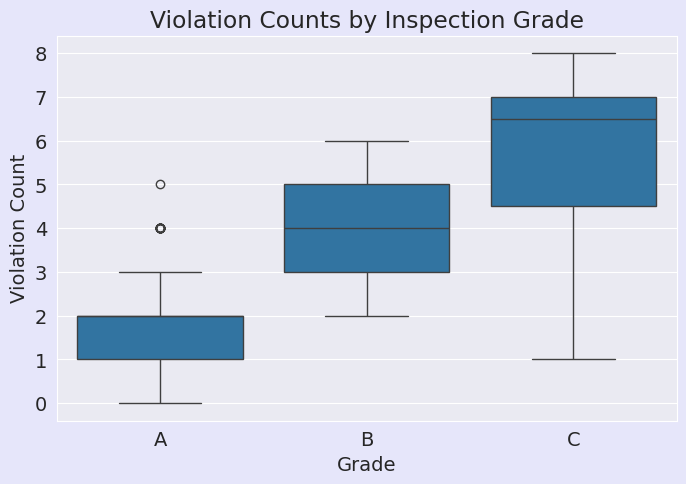

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Grade', y='Violation Count', data=aggregated_inspections)
plt.title('Violation Counts by Inspection Grade')
plt.xlabel('Grade')
plt.ylabel('Violation Count')
plt.show()

**Insight:** Violation count strongly correlates with grades. Violation count increase results in worse grades.

### **Violation Count by Borough**

In [ ]:
#violations by borough
borough_avg = aggregated_inspections.groupby('Boro')['Violation Count'].mean().reset_index()

/tmp/ipython-input-110-4033020531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Boro', y='Violation Count', data=borough_avg, palette='viridis')


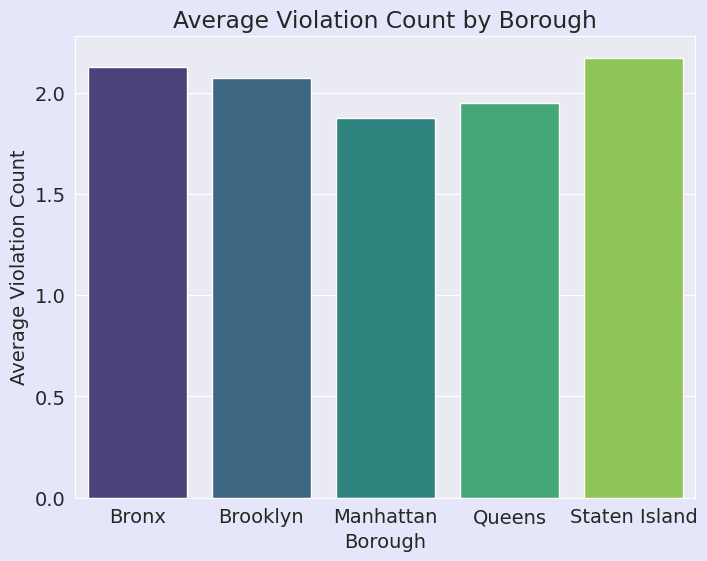

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Boro', y='Violation Count', data=borough_avg, palette='viridis')
plt.title('Average Violation Count by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Violation Count')
plt.show()

**Insight:** Average violations vary by borough, indicating regional compliance differences.

## **Monthly Trend Violations**

In [ ]:
# mean monthly trend violation
monthly_violation_counts = aggregated_inspections.groupby('Inspection Month')['Violation Count'].mean()

In [ ]:
monthly_violation_counts

,Violation Count
Inspection Month,
2015-10,2.000000
2015-11,2.500000
2016-01,3.000000
2016-03,2.000000
2016-04,0.666667
2016-05,1.538462
2016-06,1.187500
2016-08,2.666667
2016-09,1.750000


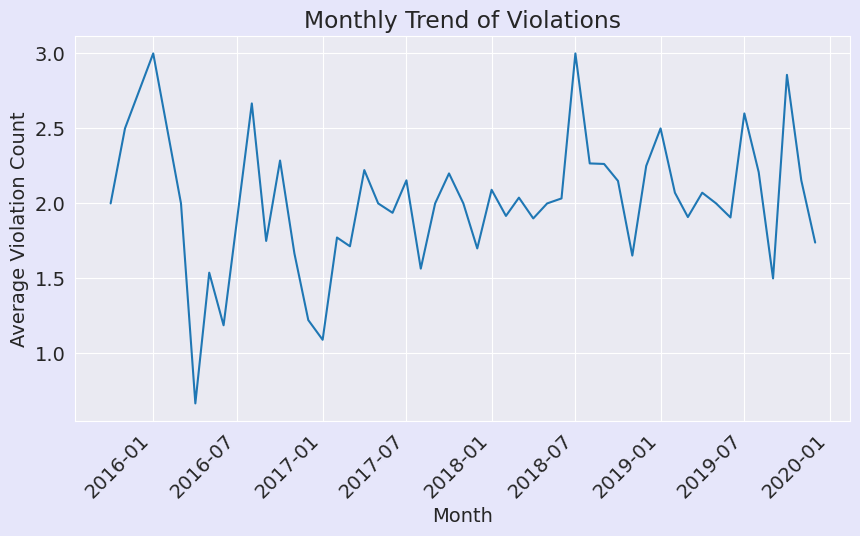

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_violation_counts.index.to_timestamp(), y=monthly_violation_counts.values)
plt.title('Monthly Trend of Violations')
plt.xlabel('Month')
plt.ylabel('Average Violation Count')
plt.xticks(rotation=45, ha='right')
plt.show()

 There's minimal improvements in inspections outcome over time, need for frequent inspections.

## **Seasonal Violatons**

In [ ]:
monthly_violation_counts = inspections_df.groupby('Month Name')['Violation Code'].count()

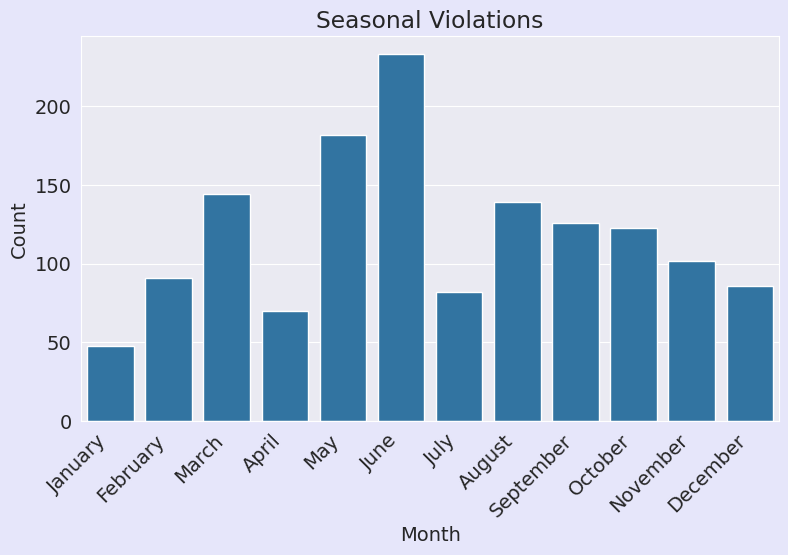

In [ ]:
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_violation_counts = monthly_violation_counts.reindex(monthly_order)

sns.barplot(x=monthly_violation_counts.index, y=monthly_violation_counts.values)
plt.title('Seasonal Violations')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights:** June(summer season) has a peak in the monthly trend violations. Warm temparatures creates ideal conditions for bacteria growth,disrupt refrigeration systems leading to spoilage.

### **Violations by Cuisine**

In [ ]:
top_cuisines = aggregated_inspections['Cuisine Description'].value_counts().head(10).index
top_cuisines

Index(['American', 'Italian', 'Latin American', 'Chinese', 'Other',
       'Caribbean', 'Coffee/Tea', 'Mexican', 'Korean', 'Bottled Beverages'],
      dtype='object', name='Cuisine Description')

In [ ]:
# top cuisine violation count
top_cuisines_summary = aggregated_inspections[aggregated_inspections['Cuisine Description'].isin(top_cuisines)]
top_cuisines_summary.groupby('Cuisine Description')['Violation Count'].mean().sort_values(ascending=False)


,Violation Count
Cuisine Description,
Latin American,2.909091
Chinese,2.857143
Mexican,2.562500
Caribbean,2.450000
Bottled Beverages,2.416667
Italian,2.318182
Korean,2.076923
Coffee/Tea,2.055556
American,1.813107


/tmp/ipython-input-118-3763353723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines_summary['Cuisine Description'], y=top_cuisines_summary['Violation Count'], palette='viridis')


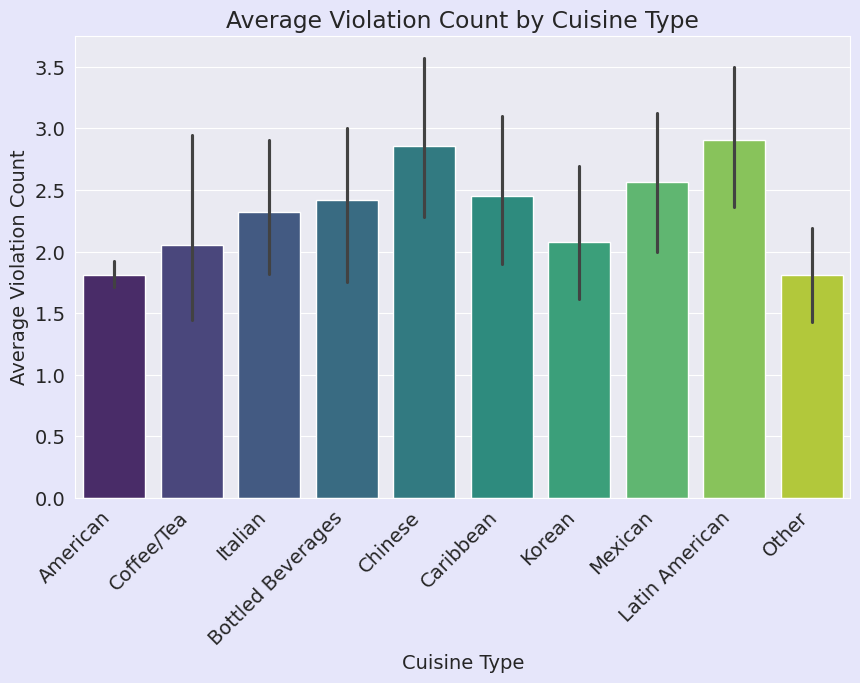

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines_summary['Cuisine Description'], y=top_cuisines_summary['Violation Count'], palette='viridis')
plt.title('Average Violation Count by Cuisine Type')
plt.xlabel  ('Cuisine Type')
plt.ylabel('Average Violation Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight:** Latin American and Chinese cuisines have higher mean violations.

In [ ]:
#violations in June
june_violations = inspections_df[inspections_df['Month'] == 6]

june_violations.head()

,Camis,Dba,Boro,Cuisine Description,Inspection Date,Action,Violation Code,Violation Description,Critical Flag,Score,Grade,Grade Date,Record Date,Inspection Type,Year,Month,Month Name
431,41426418,La Boom Club,Queens,Latin American,2019-06-30,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,12.0,A,06/30/2019,07/03/2025,Cycle Inspection / Re-inspection,2019,6,June
433,41412446,Avenue,Manhattan,American,2019-06-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,9.0,A,06/30/2019,07/03/2025,Cycle Inspection / Initial Inspection,2019,6,June
435,50007955,"Monarch Gilded Lily , Kola H",Manhattan,American,2019-06-30,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,A,06/30/2019,07/03/2025,Cycle Inspection / Initial Inspection,2019,6,June
436,41412446,Avenue,Manhattan,American,2019-06-30,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,06/30/2019,07/03/2025,Cycle Inspection / Initial Inspection,2019,6,June
437,41426418,La Boom Club,Queens,Latin American,2019-06-30,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,06/30/2019,07/03/2025,Cycle Inspection / Re-inspection,2019,6,June


In [ ]:
#group june violation codes
june_violation_counts = june_violations[['Violation Code','Violation Description']].value_counts().head(10)
june_violation_counts

,,count
Violation Code,Violation Description,
10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",45
06D,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",23
08A,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,19
06C,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",15
10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,15
04L,Evidence of mice or live mice present in facility's food and/or non-food areas.,13
10I,"Single service item reused, improperly stored, dispensed; not used when required.",12
02B,Hot food item not held at or above 140º F.,10
06E,"Sanitized equipment or utensil, including in-use food dispensing utensil, improperly used or stored.",10


In [ ]:
# monthly inspections count
monthly_inspections_count = inspections_df.groupby('Month Name')['Inspection Date'].count()
monthly_inspections_count

,Inspection Date
Month Name,
April,71
August,144
December,91
February,91
January,49
July,82
June,243
March,144
May,186


 ## **Recommendations**


*   Increase vigilance during warmer months (like June) when violations tend to increase due to temperature-related factors impacting food safety.
*   Provide guidance on proper refrigeration and handling during hot weather.
*   There's minimal impact of the current inspection frequency on the overall monthly trend of violations. Increase inspection frequency to see a more significant positive trend in reducing violations over time.